<a href="https://colab.research.google.com/github/samer-glitch/samerelhajjhassan/blob/main/0Advanced%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
try:
    # Try to convert a string to an integer
    number = float("hello")
except ValueError:
    # This block runs if there was a ValueError
    print("Oops! That was not a valid number.")


Oops! That was not a valid number.


In [21]:
!python --version

Python 3.10.12


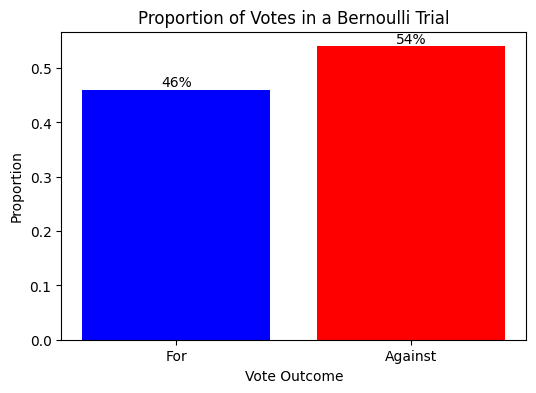

In [20]:
import matplotlib.pyplot as plt

# Given values
p_for = 0.46 # Probability of vote = 'for'
p_against = 1 - p_for # Probability of vote = 'against'

# Data for visualization
votes = ['For', 'Against']
proportions = [p_for, p_against]

# Creating the bar graph
plt.figure(figsize=(6,4))
bars = plt.bar(votes, proportions, color=['blue', 'red'])

# Adding the percentages on the bars
for bar in bars:
 yval = bar.get_height()
 plt.text(bar.get_x() + bar.get_width()/2, yval, f"{int(yval*100)}%", va='bottom', ha='center')

# Setting the title and labels
plt.title('Proportion of Votes in a Bernoulli Trial')
plt.xlabel('Vote Outcome')
plt.ylabel('Proportion')

# Show the plot
plt.show()


In [3]:
import matplotlib.pyplot as plt
import math

# Given values
p_for = 0.46 # Probability of vote = 'for'
p_against = 1 - p_for # Probability of vote = 'against'

# Data for visualization
votes = ['For', 'Against']
proportions = [p_for, p_against]

# Define the function
def probability_function(y):
 return 1 - (48/99) * math.exp(-2 * math.sqrt(y)) - (51/99) * math.exp(-2 * y**(1/3))

# Calculate the probability between 2 and 4 hours
probability_2_to_4_hours = probability_function(4) - probability_function(2)
print( "CDF(4)=" , probability_function(4))
print( "CDF(2)=" , probability_function(2))
print( "the probability between 2 and 4 hours = " , probability_2_to_4_hours)

CDF(4)= 0.9695851330095617
CDF(2)= 0.9298872347031599
the probability between 2 and 4 hours =  0.0396978983064018


<ipython-input-4-3ce7b710ffed>:5: RuntimeWarning: divide by zero encountered in power
  def pdf(y): return (48/99) * y**(-1/2) * np.exp(-2 * y**(1/2)) + (34/99) * y**(-2/3) * np.exp(-2 * y**(1/3))


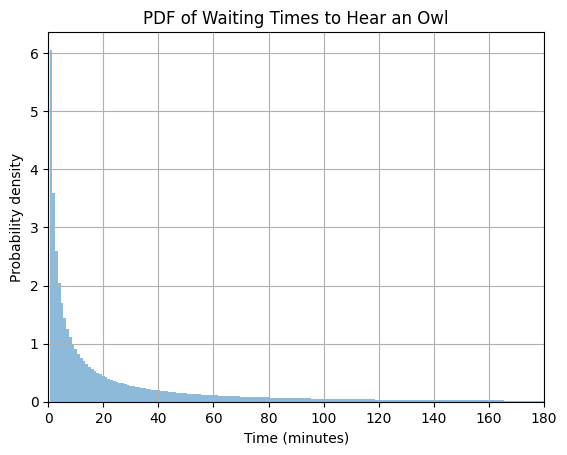

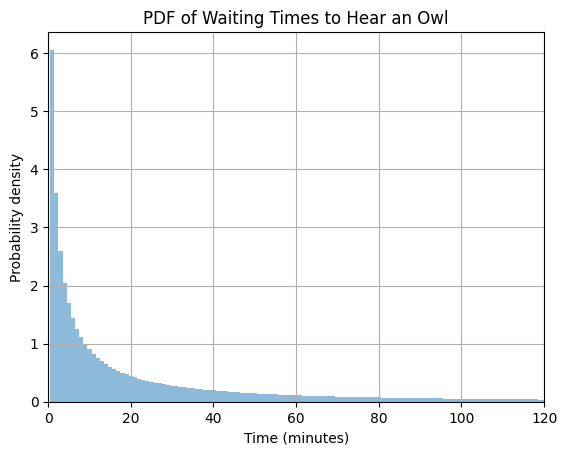

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability density function
def pdf(y): return (48/99) * y**(-1/2) * np.exp(-2 * y**(1/2)) + (34/99) * y**(-2/3) * np.exp(-2 * y**(1/3))
def cdf(y): return 1 - (48/99) * np.exp(-2 * y**(1/2)) - (51/99) * np.exp(-2 * y**(1/3))

# Generate a range of y values in minutes
y_values_minutes = np.linspace(0, 180, 181)

# Compute the PDF values for each y value in minutes
pdf_values_minutes = pdf(y_values_minutes / 60) # Convert y values from minutes to hours

# Plot the histogram
fig, ax = plt.subplots()
ax.bar(y_values_minutes, pdf_values_minutes, width=1, alpha=0.5)
ax.set_xlim(0, 180)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Probability density')
ax.set_title('PDF of Waiting Times to Hear an Owl')
ax.grid(True) # Add grid lines
plt.show()

# Plot the histogram
fig, ax = plt.subplots()
ax.bar(y_values_minutes, pdf_values_minutes, width=1, alpha=0.5)
ax.set_xlim(0, 120)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Probability density')
ax.set_title('PDF of Waiting Times to Hear an Owl')
ax.grid(True) # Add grid lines
plt.show()


The probability that we need to wait between [2,4] hours to hear the owl= 0.0396978983064018
Mean: 0.82 hours = 49.32 minutes
Variance: 8.74 hours² = 524.69 minutes²

First quartile q25%: 0.0081 hours = 0.4844 minutes
Second quartile q50%: 0.0761 hours = 4.5653 minutes
Third quartile q75%: 0.4138 hours = 24.8254 minutes



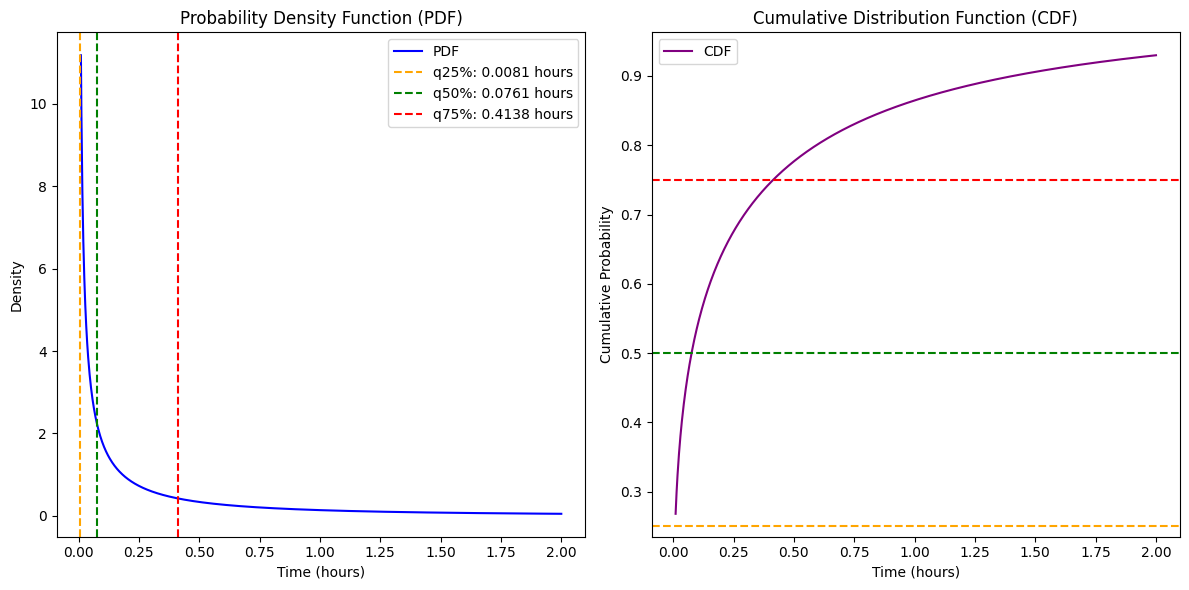

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

# Define the probability density function
def pdf(y): return (48/(99*np.sqrt(y))) * np.exp(-2 * np.sqrt(y)) + (51/(99*y**(2/3))) * np.exp(-2 *
y**(1/3))

# Calculate the mean (expected value) using integration
mean, _ = integrate.quad(lambda y: y * pdf(y), 0, np.inf)

# Calculate the variance using integration
variance, _ = integrate.quad(lambda y: (y**2) * pdf(y), 0, np.inf)
variance -= mean**2

# Define the cumulative distribution function
def cdf(y): return 1 - (48/99) * np.exp(-2 * (y**(1/2))) - (51/99) * np.exp(-2 * (y**(1/3)))

# Calculate the probability between 2 and 4 hours using integration
probability_2_to_4 = cdf(np.array([4])) - cdf(np.array([2]))
print("The probability that we need to wait between [2,4] hours to hear the owl=",
probability_2_to_4[0])

# Print the mean and variance
print(f"Mean: {mean:.2f} hours = {mean*60:.2f} minutes")
print(f"Variance: {variance:.2f} hours\u00B2 = {variance*60:.2f} minutes\u00B2")

# Find the quartiles by solving CDF(y) = 0.25, 0.50, 0.75
q1 = optimize.root_scalar(lambda y: cdf(y) - 0.25, bracket=[0, 10], method='brentq').root
q2 = optimize.root_scalar(lambda y: cdf(y) - 0.50, bracket=[0, 10], method='brentq').root
q3 = optimize.root_scalar(lambda y: cdf(y) - 0.75, bracket=[0, 10], method='brentq').root

# Format the output to make Q1, Q2, and Q3 bold
print(f"\nFirst quartile q25%: {q1:.4f} hours = {q1*60:.4f} minutes")
print(f"Second quartile q50%: {q2:.4f} hours = {q2*60:.4f} minutes")
print(f"Third quartile q75%: {q3:.4f} hours = {q3*60:.4f} minutes\n")

# Define the range of y values and calculate PDF
y_values = np.linspace(0.01, 2, 1000) # Range of hours (up to 2 hours for better visualization)
pdf_values = pdf(y_values)

# Define the range of y values and calculate PDF and CDF
y_values = np.linspace(0.01, 2, 1000) # Range of hours (up to 2 hours for better visualization)
pdf_values = pdf(y_values)
cdf_values = [cdf(y) for y in y_values]

# Plot the PDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y_values, pdf_values, color='blue', label='PDF')
plt.axvline(x=q1, color='orange', linestyle='--', label=f'q25%: {q1:.4f} hours')
plt.axvline(x=q2, color='green', linestyle='--', label=f'q50%: {q2:.4f} hours')
plt.axvline(x=q3, color='red', linestyle='--', label=f'q75%: {q3:.4f} hours')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Time (hours)')
plt.ylabel('Density')
plt.legend()

# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(y_values, cdf_values, color='purple', label='CDF')
plt.axhline(y=0.25, color='orange', linestyle='--')
plt.axhline(y=0.50, color='green', linestyle='--')
plt.axhline(y=0.75, color='red', linestyle='--')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Time (hours)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.tight_layout()
plt.show()


MLE = 47.1


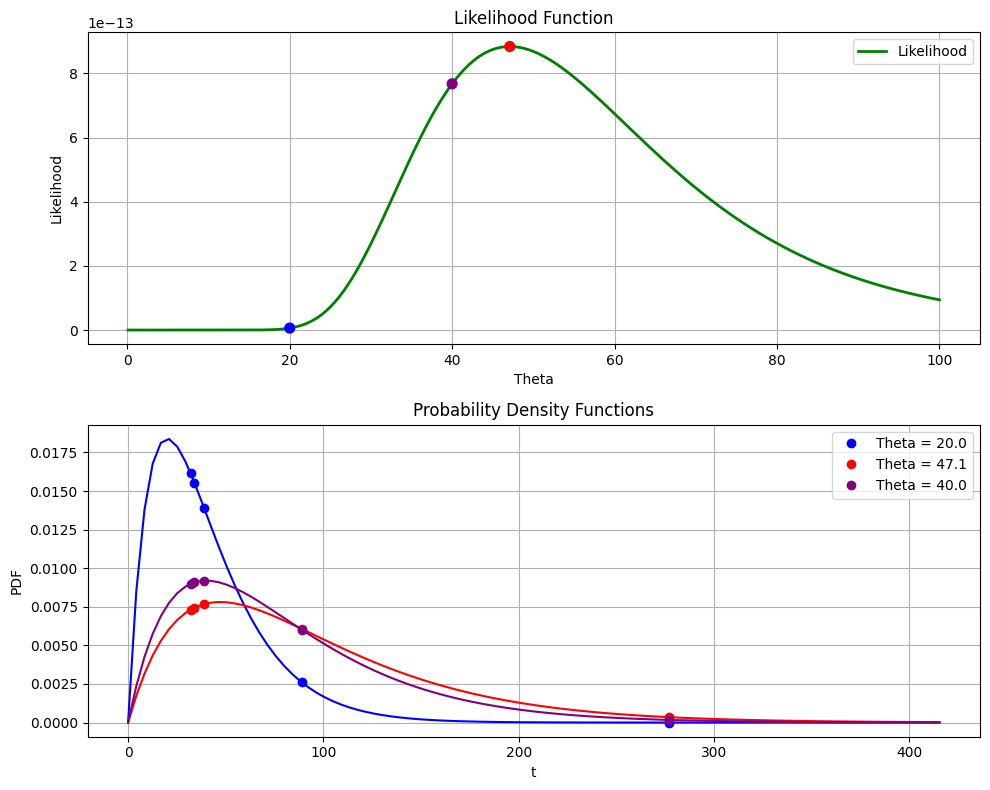

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data and function definitions
t = np.array([89, 277, 39, 32, 34])
pdf = lambda t, theta: t / (theta ** 2) * np.exp(-t / theta)

likelihood = lambda t, theta: np.prod(pdf(t, theta))

# Parameter range and likelihood calculation
theta = np.linspace(0.1, 100, 1000)
y = np.array([likelihood(t, th) for th in theta])
optimal_theta = theta[np.argmax(y)]
print ("MLE =",optimal_theta)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
# Likelihood plot
ax[0].plot(theta, y, 'g-', lw=2, label='Likelihood')
ax[0].scatter([20, optimal_theta, 40], [likelihood(t, 20), likelihood(t, optimal_theta), likelihood(t, 40)], color=['blue', 'red', 'purple'], s=50, zorder=5)
ax[0].set_title('Likelihood Function')
ax[0].set_xlabel('Theta')
ax[0].set_ylabel('Likelihood')
ax[0].legend()
ax[0].grid(True)

# PDF plot
colors = ['blue', 'red', 'purple']
for i, theta_val in enumerate([20, optimal_theta, 40]):
  ax[1].plot(t, pdf(t, theta_val), color=colors[i], marker='o', linestyle='', label=f'Theta = {theta_val:.1f}')
  sample = np.linspace(0, max(t) * 1.5, 100)
  ax[1].plot(sample, pdf(sample, theta_val), color=colors[i], linestyle='-', label='_nolegend_')

ax[1].set_title('Probability Density Functions')
ax[1].set_xlabel('t')
ax[1].set_ylabel('PDF')
ax[1].legend()
ax[1].grid(True)
plt.tight_layout()
plt.show()

New Mean: 904.00, New STD: 71.1430


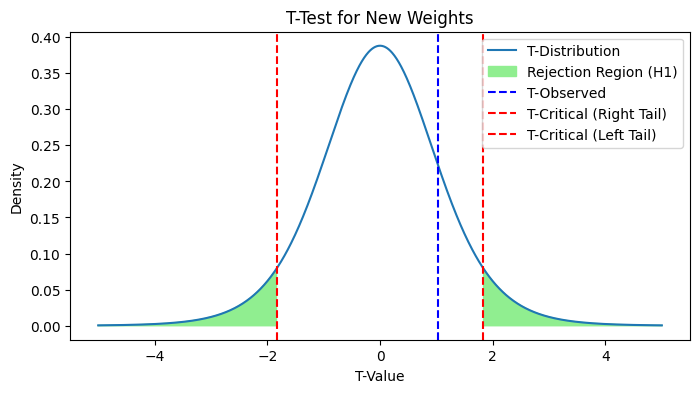

T-Statistic: 1.0223, Critical Value: 1.8331, P-Value: 1.6667
Fail to Reject H0: No significant evidence of difference in weights in the new system.


In [17]:
# Old system statistics
old_mean = 881
old_std = 78

# New system data
new_weights = [833, 1038, 893, 795, 983, 878, 859, 899, 939, 923]
new_mean = np.mean(new_weights)
new_std = np.std(new_weights, ddof=1)

# Print basic statistics
print(f"New Mean: {new_mean:.2f}, New STD: {new_std:.4f}")

# Define alpha (significance level)
alpha = 0.05

# T-test calculations
t_statistic = (new_mean - old_mean) / (new_std / np.sqrt(len(new_weights)))
critical_value = t.ppf(1 - alpha, df=len(new_weights) - 1)  # Two-sided test adjusted
p_value = t.cdf(t_statistic, df=len(new_weights) - 1) * 2  # Two-sided test adjusted

# Plotting
plt.figure(figsize=(8, 4))
x_values = np.linspace(-5, 5, 1000)
t_dist = t.pdf(x_values, len(new_weights) - 1)
plt.plot(x_values, t_dist, label='T-Distribution')
plt.fill_between(x_values, t_dist, where=(x_values <= -critical_value) | (x_values >= critical_value), color='lightgreen', label='Rejection Region (H1)')
plt.axvline(t_statistic, color='blue', linestyle='--', label='T-Observed')
plt.axvline(critical_value, color='red', linestyle='--', label='T-Critical (Right Tail)')
plt.axvline(-critical_value, color='red', linestyle='--', label='T-Critical (Left Tail)')
plt.xlabel('T-Value')
plt.ylabel('Density')
plt.title('T-Test for New Weights')
plt.legend()
plt.show()

# Results summary
print(f"T-Statistic: {t_statistic:.4f}, Critical Value: {critical_value:.4f}, P-Value: {p_value:.4f}")
if abs(t_statistic) > critical_value:
  print("Reject H0: New system likely produces weights different from the old system.")
else:
  print("Fail to Reject H0: No significant evidence of difference in weights in the new system.")


Alpha_ols 13 coefficients
[-1.38390853e+13  6.30294052e+12  4.19805251e+12 -3.16699114e+11
 -1.66538486e+11  4.96617739e+09  2.28168280e+09 -3.24710033e+07
 -1.37252304e+07  9.20412249e+04  3.71869667e+04 -9.91057489e+01
 -4.60370302e+01]

OLS Approximation Function degree 12
y = -13839085310971.621094 + 6302940521853.715820x^1 + 4198052513902.598633x^2 + -316699114267.819031x^3 + -166538485975.263275x^4 + 4966177390.121021x^5 + 2281682802.752174x^6 + -32471003.328703x^7 + -13725230.431106x^8 + 92041.224891x^9 + 37186.966739x^10 + -99.105749x^11 + -46.037030x^12



Alpha_ridge 13 coefficients
[-1.00969302e+13  6.18717967e+12  3.88076368e+12 -3.16294952e+11
 -1.59149597e+11  4.99949063e+09  2.20876703e+09 -3.28634238e+07
 -1.33774775e+07  9.35650765e+04  3.63942938e+04 -1.01040293e+02
 -4.53454161e+01]

OLS Ridge-regularized Approximation Function degree 12 (lambda = 1)
y = -10096930239498.603516 + 6187179668082.725586x^1 + 3880763677160.138672x^2 + -316294951629.503296x^3 + -1591495973

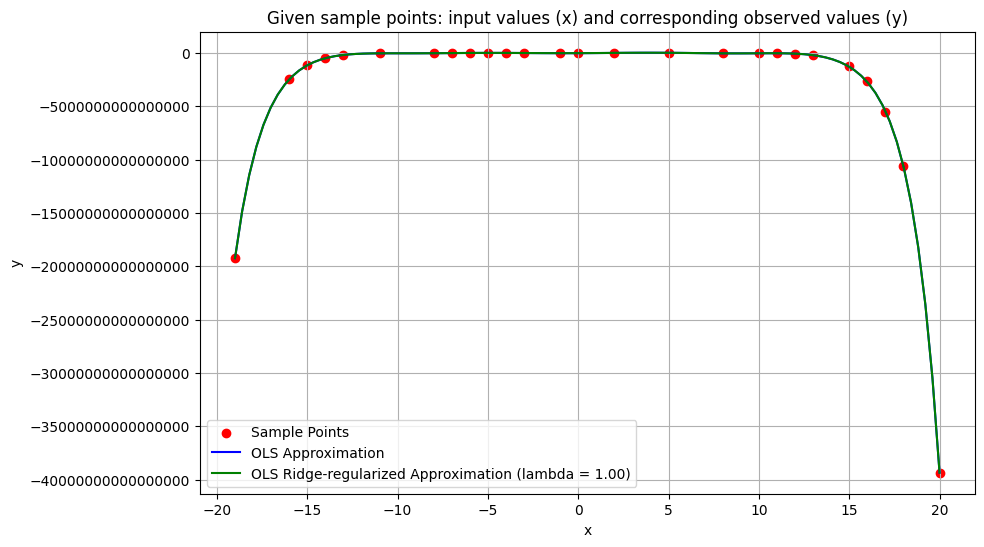

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Function for Ordinary Least Squares (OLS) Regression
def ols_regression(X, y):
    alpha_ols = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return alpha_ols

# Function for Ridge Regression
def ols_ridge_regression(X, y, optimal_lambda):
    alpha_ridge = np.linalg.inv(X.T.dot(X) + optimal_lambda * np.eye(X.shape[1])).dot(X.T).dot(y)
    return alpha_ridge

# Function to calculate model metrics
def calculate_model_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Function for Cross Validation
def cross_validation(X, y, lambda_values, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    avg_r2_scores = []

    for lambda_ridge in lambda_values:
        r2_scores = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            alpha_ridge = ols_ridge_regression(X_train, y_train, lambda_ridge)
            y_val_pred = X_val.dot(alpha_ridge)
            r2_scores.append(r2_score(y_val, y_val_pred))
        avg_r2_scores.append(np.mean(r2_scores))

    optimal_lambda_idx = np.argmax(avg_r2_scores)
    optimal_lambda = lambda_values[optimal_lambda_idx]

    return optimal_lambda

# Function to format approximation function
def format_approximation_function(alpha):
    function_str = "y = {:.6f}".format(alpha[0])  # Add the constant term
    for i in range(1, len(alpha)):
        function_str += " + {:.6f}x^{}".format(alpha[i], i)
    return function_str

# Function to plot approximation functions
def plot_approximation_functions(sample_points, alpha_ols, alpha_ridge, n_params, optimal_lambda):
    x_sample = [point[0] for point in sample_points]
    y_sample = [point[1] for point in sample_points]

    plt.figure(figsize=(10, 6))
    plt.scatter(x_sample, y_sample, color='red', label='Sample Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Given sample points: input values (x) and corresponding observed values (y)')

    x_range = np.linspace(min(x_sample), max(x_sample), num=100)
    X_range = np.column_stack([x_range**j for j in range(n_params)])
    y_ols_approx = X_range.dot(alpha_ols)
    y_ridge_approx = X_range.dot(alpha_ridge)

    plt.plot(x_range, y_ols_approx, label='OLS Approximation', color='blue')
    plt.plot(x_range, y_ridge_approx, label='OLS Ridge-regularized Approximation (lambda = {:.2f})'.format(optimal_lambda), color='green')
    plt.legend()
    plt.grid(True)

    # Set y-axis labels in plain numbers
    plt.ticklabel_format(axis='y', style='plain')
    plt.show()

# Print formatting functions
def print_title(title):
    print("\033[1m" + title + "\033[0m")

def print_function(title, function):
    print_title(title)
    print(function + "\n")

# Sample points and data preparation
sample_points = [(-6, -17269620902.6), (8, -681647447607.05), (20, -39345225108576510), (-13, -192804729081915.84), (-16, -2481323638811224.5), (2, -38473.38),
                 (-3, -3123436.35), (-7, -107160258643.97), (-19, -19234769431677308), (16, -2664041673615311.5), (-5, -1768885961.67), (5, -2303378672.37),
                 (-14, -492208404608014.9), (-15, -1120840844167045), (-8, -571638486726.46), (17, -5541798879470713), (12, -82320694104960.17), (-11, -27617808320501.89),
                 (0, 9.38), (18, -10559691655246020), (11, -28247028032437.46), (-4, -123749798.1), (15, -1249639258571413.2), (-1, 8.72),
                 (13, -217987622970598.62), (10, -9313207763784.22)]

n_params = 13 # Number of parameters

# Set up the design matrix X and the response vector y
X = np.zeros((len(sample_points), n_params))
y = np.zeros(len(sample_points))

for i, (x, val) in enumerate(sample_points):
    for j in range(n_params):
        X[i, j] = x ** j
    y[i] = val

# Calculate OLS estimate
alpha_ols = ols_regression(X, y)
print_function("Alpha_ols 13 coefficients", str(alpha_ols))

ols_approximation_function = format_approximation_function(alpha_ols)
print_function("OLS Approximation Function degree 12", ols_approximation_function)
print("\n")

# Cross-validation for selecting the optimal lambda value
# lambda_values = np.logspace(-4, 3, num=21)  # Exploring smaller lambda values
# optimal_lambda = cross_validation(X, y, lambda_values)
# print_function("Optimal Lambda", str(optimal_lambda))
optimal_lambda = 1

# Calculate OLS ridge-regularized estimate with the optimal lambda
alpha_ridge = ols_ridge_regression(X, y, optimal_lambda)
print_function("Alpha_ridge 13 coefficients", str(alpha_ridge))

ridge_approximation_function = format_approximation_function(alpha_ridge)
print_function("OLS Ridge-regularized Approximation Function degree 12 (lambda = {})".format(optimal_lambda), ridge_approximation_function)
print("\n")

# Just for testing OLS and OLS Ridge coefficients when optimal_lambda = 0
# optimal_lambda_0 = 0
# alpha_ridge_0 = ols_ridge_regression(X, y, optimal_lambda_0)
# ridge_approximation_function_0 = format_approximation_function(alpha_ridge_0)
# print_function("OLS Ridge-regularized Approximation Function = OLS (when lambda = {})".format(optimal_lambda_0), ridge_approximation_function_0)
# print("\n")

# Calculate model metrics for OLS and Ridge
y_ols_pred = X.dot(alpha_ols)
mse_ols, rmse_ols, r2_ols = calculate_model_metrics(y, y_ols_pred)

y_ridge_pred = X.dot(alpha_ridge)
mse_ridge, rmse_ridge, r2_ridge = calculate_model_metrics(y, y_ridge_pred)

# Print model metrics
print_function("OLS Metrics", "MSE: {}\nRMSE: {}\nR-squared: {}".format(mse_ols, rmse_ols, r2_ols))
print_function("OLS Ridge-regularized Metrics (lambda = {})".format(optimal_lambda), "MSE: {}\nRMSE: {}\nR-squared: {}".format(mse_ridge, rmse_ridge, r2_ridge))

# Plot the sample points and approximation functions
plot_approximation_functions(sample_points, alpha_ols, alpha_ridge, n_params, optimal_lambda)
